<h1>MNIST DATASET </h1>

# Import Libraries

In [1]:
!pip show tensorflow
!pip show keras

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\silwa\AppData\Roaming\Python\Python312\site-packages
Requires: tensorflow-intel
Required-by: 
Name: keras
Version: 3.7.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: C:\Users\silwa\AppData\Roaming\Python\Python312\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow_intel


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import cv2
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import BatchNormalization
import warnings                      
warnings.simplefilter("ignore")  # ignores the warning

# Load .npy file

In [2]:
# Load the MNIST data from .npy file
data = np.load('data/mnist_data.npy', allow_pickle=True)
images = data.item().get('images')
labels = data.item().get('labels')

# Visualize

In [3]:
import random

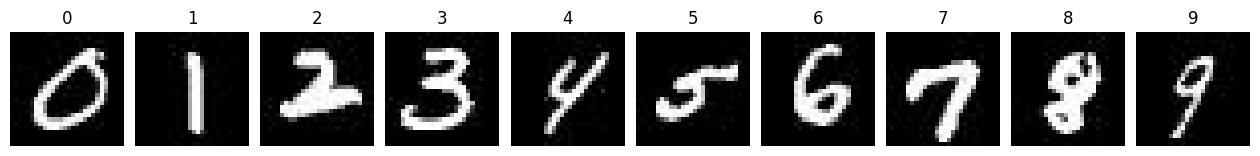

In [4]:
def random_value_for_index(labels, target_value):
    indices = [index for index, value in enumerate(labels) if value == target_value]
    return random.choice(indices)

# Define categories
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create subplots
fig, axs = plt.subplots(1, 10, figsize=(16, 16))

for index, category in enumerate(categories):
    # Select random image index from specific category
    random_index = random_value_for_index(labels, category)
    # Plot the random image
    axs[index].imshow(images[random_index].reshape(28, 28), cmap='gray')
    axs[index].axis('off')
    axs[index].set_title(category)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# Train Test Split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(images, labels, test_size=0.2, random_state=11)

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
x_train_reshaped = x_train.reshape((-1,28, 28,1))
x_test_reshaped = x_test.reshape((-1,28,28,1))

In [8]:
print("X_train shape : ",x_train_reshaped.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",x_test_reshaped.shape)
print("y_test shape : ",y_test.shape)


X_train shape :  (33600, 28, 28, 1)
y_train shape :  (33600,)
X_test shape :  (8400, 28, 28, 1)
y_test shape :  (8400,)


# Train CNN model

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [10]:
model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=16, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
    
model.add(Dense(10,activation="softmax"))
    

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         9,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,266 (149.48 KB)

 Trainable params: 38,106 (148.85 KB)

 Non-trainable params: 160 (640.00 B)

# Early Stopping

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_accuracy',patience=5)

In [13]:
# log_dir = "logs/mnist_cnn/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/mnist_cnn/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Compile

In [14]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train

In [15]:
history = model.fit(x_train_reshaped, y_train, epochs=5, batch_size=32, validation_split=0.3,callbacks=[early_stop,tensorboard_callback])

Epoch 1/5
735/735 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.7345 - loss: 0.8904 - val_accuracy: 0.9181 - val_loss: 0.2945
Epoch 2/5
735/735 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9570 - loss: 0.1459 - val_accuracy: 0.9633 - val_loss: 0.1235
Epoch 3/5
735/735 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9699 - loss: 0.0970 - val_accuracy: 0.9706 - val_loss: 0.0966
Epoch 4/5
735/735 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9765 - loss: 0.0749 - val_accuracy: 0.9711 - val_loss: 0.0975
Epoch 5/5
735/735 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9825 - loss: 0.0585 - val_accuracy: 0.9681 - val_loss: 0.1069


# Metrics

In [16]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

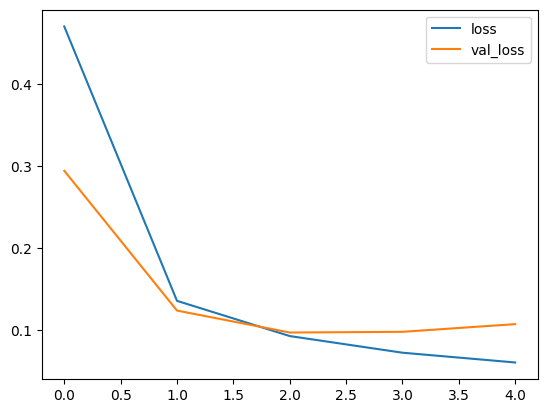

In [17]:
metrics[['loss','val_loss']].plot()

<Axes: >

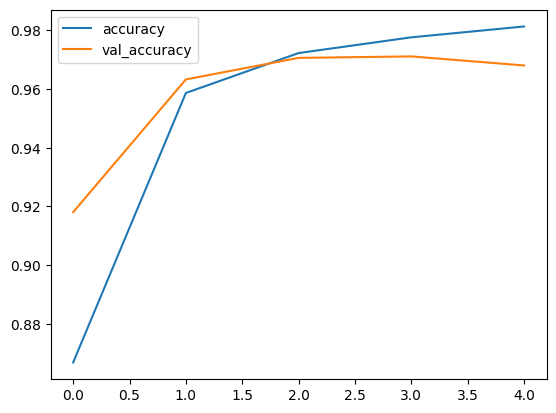

In [18]:
metrics[['accuracy', 'val_accuracy']].plot()

In [19]:
model.save("model/mnist_cnn.h5")

In [20]:
from keras.models import load_model
model= load_model("model/mnist_cnn.h5")

# Predict on Test data

In [21]:
y_pred = model.predict(x_test_reshaped)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [22]:
y_pred = np.argmax(y_pred, axis=1)

<h2>Model Evaluation</h2>

In [23]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [24]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test,average="macro"))
print("Precision-Score :",precision_score(y_pred,y_test,average="macro"))
print("F1-Score :",f1_score(y_pred,y_test,average="macro"))

Model's acuracy : 0.9691666666666666
Recall-Score : 0.9691378642906381
Precision-Score : 0.9688423833051889
F1-Score : 0.9687695829530671


In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       829
           1       0.98      0.99      0.99       925
           2       0.97      0.97      0.97       856
           3       0.97      0.97      0.97       868
           4       0.95      0.98      0.97       797
           5       0.98      0.95      0.97       796
           6       0.98      0.98      0.98       805
           7       0.99      0.95      0.97       942
           8       0.98      0.93      0.95       816
           9       0.92      0.97      0.94       766

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



# Confusion Matrix

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

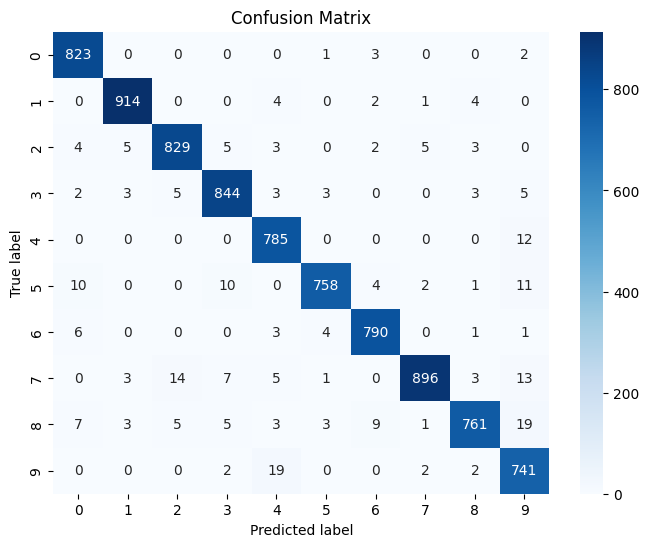

In [27]:
# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Visualize

In [28]:
from tensorflow.keras.models import Model

In [29]:
def get_layer_output(model, layer_name, input_image):
    layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    output = layer_model.predict(input_image)
    return output

def plot_conv_layer_outputs(layer_output, layer_name, num_columns=8):
    num_filters = layer_output.shape[-1]
    size = layer_output.shape[1]
    
    num_rows = int(np.ceil(num_filters / num_columns))
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns*2, num_rows*2))
    axes = axes.flatten()
    
    for i in range(num_filters):
        ax = axes[i]
        ax.imshow(layer_output[0, :, :, i], cmap='gray')
        ax.axis('off')
        ax.set_title(f'{layer_name} {i+1}')
    
    # Hide unused subplots
    for j in range(num_filters, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_dense_layer_output(layer_output, layer_name):
    plt.figure(figsize=(10, 5))
    plt.bar(range(layer_output.shape[1]), layer_output[0], color='skyblue')
    plt.title(f'{layer_name} Output')
    plt.xlabel('Neuron')
    plt.ylabel('Activation')
    plt.grid(True)
    plt.show()


In [30]:
sample_image = cv2.imread("data/test/img_3.jpg",cv2.IMREAD_GRAYSCALE)
sample_image = np.expand_dims(sample_image, axis=0)  


In [31]:
# Iterate through all layers to get and plot activations
for layer in model.layers:
    print(layer)
    
    # For convolutional layers
    if 'conv' in layer.name:
        layer_output = get_layer_output(model, layer.name, sample_image)
        plot_conv_layer_outputs(layer_output, layer.name)
    
    # For dense layers
    elif 'dense' in layer.name:
        layer_output = get_layer_output(model, layer.name, sample_image)
        plot_dense_layer_output(layer_output, layer.name)
    
    # For max pooling layers
    elif 'pool' in layer.name or 'max_pool' in layer.name:
        layer_output = get_layer_output(model, layer.name, sample_image)
        plot_conv_layer_outputs(layer_output, layer.name)  # Use the same function as for conv layers


<Conv2D name=conv2d, built=True>


AttributeError: The layer sequential has never been called and thus has no defined input.

# Assignment

<li> Perform Inference </li>